## Classification

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


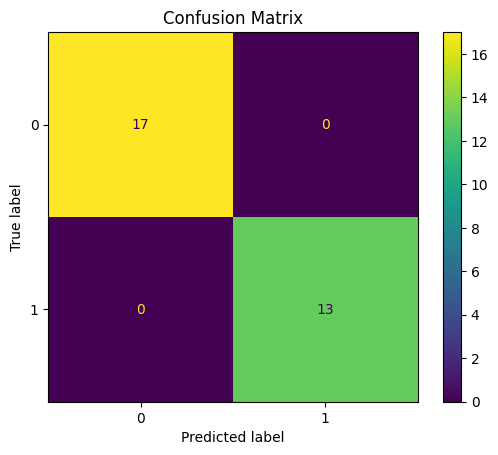

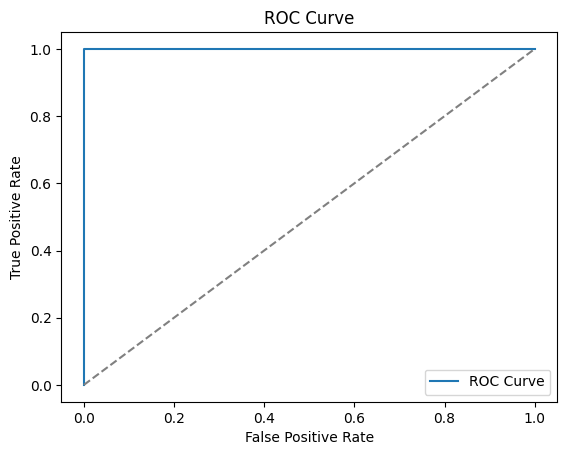

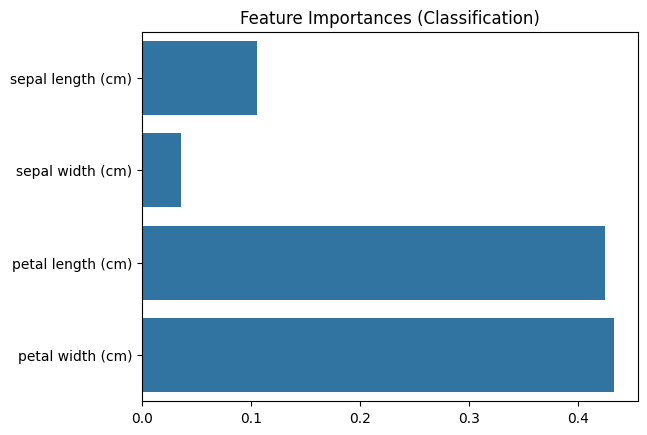

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)
import seaborn as sns

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binary classification (just class 0 vs 1)
X = X[y != 2]
y = y[y != 2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# 📊 Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# 📈 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 📊 Feature Importance
sns.barplot(x=clf.feature_importances_, y=iris.feature_names[:4])
plt.title("Feature Importances (Classification)")
plt.show()

## Regression

MAE: 0.33228759407299757
MSE: 0.25650512920799395
RMSE: 0.5064633542597075
R²: 0.8045734925119942


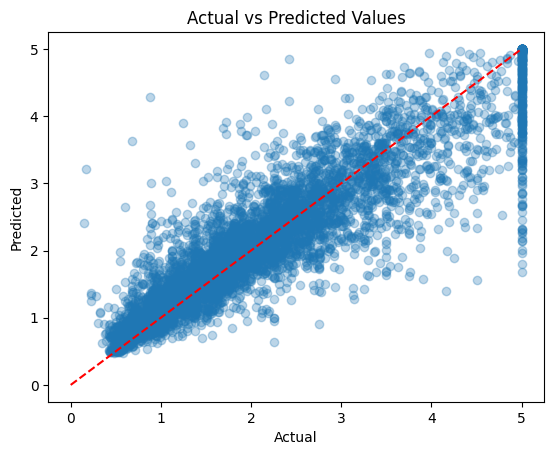

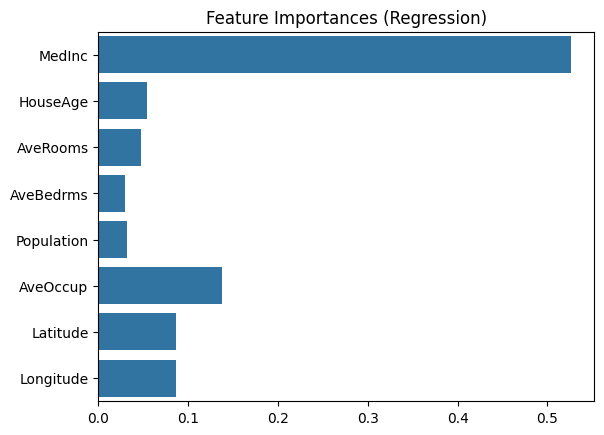

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# 📈 Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 5], [0, 5], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

# 📊 Feature Importance
sns.barplot(x=reg.feature_importances_, y=data.feature_names)
plt.title("Feature Importances (Regression)")
plt.show()